In [5]:
# allows for multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing necessary libraries
import os
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import etree
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
# Feedback on your intermediate report:

# Please provide a title: 
    #Taxonomy Classification and Quinone Analysis from Scientific Publications: A Natural Language Processing Approach
# The report is clear and fulfills the requirements, but it contains many typos that should be corrected.

# There is no explicit related work section, and only one reference is given, this has to be strengthened.
# State of the art - explain the importance of work and relate it to how the last real research done on this was from the 1981 paper
# quinones are sometimes used as taxonomic markers - specific quiones can be link to specific species
# molecule that is a diagnostic for certain species
# look at relation same species order have same quinones

# There is a figure that reports experiments but no details are given. - explain to novice reader
# What was the motivation and the experimental conditions?
# Unique topic, computer science to improve the field of biology
# biological context - info, importantance, understand of quinone distrubution lilited. info in journals, microbiology intrest in quinones, TIMC motivations - pathways oninone biosynthese, resparatory chains, qunone type breath different substrates, what conditions organism can grow and colonize. quinone and organism give a hint of what conditions are used to grow them

# team - charaterizing quinone pathways by identifying genes in production
# confront with team data - validate, discover new pathways? 
# figures to explain the pathways, variants, etc.
# very expiremental work - plenty of surprises

# The purpose is to extract all this uncollected quinone data and compare it to research, in a way validating the journals and updating any new discoveries or information previously unknown.

# species -> quinones


In [ ]:

## keyword analysis - create a counter dictionary and update it with quinones from data
## taxonomy classification - NCBI's API for taxonony data?
## quinone length analysis
## visualization 

# statistics - on taxonomy distribution, chains of quinones, lengths varying different genus/order, variablility in the quinone chain.


# crosscheck species/genus mentioned in title with abstract to find sentence where that specific species/genus was mentioned.
### check what to do with pubmedResults.txt file
# classify organisms using the taxonomy based on species and genus names extracted.
# the hierarchical classification order - missing species
# look for artices given a species, validate quinone info.
# get the tail length in a new column.
# determine frequency of occurrence of each type of quinone in data set.
from collections import Counter
from nltk.tokenize import word_tokenize

quinone_counter = Counter()

for quinone_description in df["Quinone Description"]:
    tokens = word_tokenize(quinone_description)
    quinone_counter.update([token for token in tokens if token in quinone_types])

print(quinone_counter)

# identify relationships between types of quinones found and species or genus of organisms.
# look for patterns or trends in data that might indicate a relationship between length of quinone tail and species or genus of organism.
# create visualizations to better understand and communicate these patterns or relationships.
# based on these patterns or relationships, make predictions about types of quinones that might be found in other species or genus.


# using 'Species and Genus' classify organisms according to their taxonomy 
# link organisms to specific quinones using 'Quinone Found' 
# understand quinone structure: information about type of quinone and length of quinone tail can be used to study structural diversity of quinones across different organisms.




In [ ]:
# Keyword Analysis:
    # Create a counter dictionary.
    # Update the counter dictionary with quinones from the data.
# Taxonomy Classification:
    # Utilize NCBI's API for taxonomy data to classify organisms based on species and genus names extracted.
# Quinone Length Analysis:
    # Extract the length of the quinone tail and add it to a new column in the DataFrame.
    # Analyze the variability in quinone chain lengths across different genera or orders.
# Visualization:
    # Create visualizations to represent the statistics and relationships discovered in the analysis.
# Statistics:
    # Calculate statistics on the taxonomy distribution of organisms.
    # Analyze chains of quinones and identify patterns or trends.
    # Assess the variability in quinone chain lengths across different genera or orders.
# Crosscheck Species/Genus Mentioned:
    # Match species/genus mentioned in the title with the abstract to find the sentence where a specific species/genus was mentioned.
# Validate Quinone Information:
    # Look for articles related to a species and validate the quinone information.
# Frequency of Quinones:
    # Determine the frequency of occurrence for each type of quinone in the dataset.
# Relationship Identification:
    # Identify relationships between types of quinones and species/genus of organisms.
    # Look for patterns or trends indicating a relationship between the length of the quinone tail and the species/genus of the organism.
# Visualization:
    # Create visualizations to understand and communicate the identified patterns or relationships.
# Quinone Structure Study:
    # Use information about the type of quinone and length of the quinone tail to study the structural diversity of quinones across different organisms.

In [1]:
# Import necessary libraries
import re
import pandas as pd
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

# quinone dictionary
quinones = {
    "q": [r"\bquinone\b",r"\bquinone {}\b", r"\bq{}\b", r"\bq-{}\b", r"q\({}\)",
          r"\b{},{}-benzoquinone\b",r"\b{},{}-bq\b", 
          r"\b{},{}-dimethyl-{},{}-benzoquinone\b",r"\b{},{}-dimethyl-{},{}-bq\b", r"\b{},{}-d-{},{}-benzoquinone\b",r"\b{},{}-d-{},{}-bq\b", 
          r"\b{}-methyl-{},{}-naphthoquinone\b", r"\b{}-methyl-{},{}-nq\b", r"\b{}-m-{},{}-naphthoquinone\b", r"\b{}-m-{},{}-nq\b",
          r"\b{},{}-dimethoxy-{},{}-naphthoquinone\b", r"\b{},{}-dimethoxy-{},{}-nq\b",r"\b{},{}-d-{},{}-naphthoquinone\b", r"\b{},{}-d-{},{}-nq\b",
          r"\b{},{},{},{}-tetramethyl-{},{}-benzoquinone\b", r"\b{},{},{},{}-tetramethyl-{},{}-bq\b", r"\b{},{},{},{}-t-{},{}-benzoquinone\b", r"\b{},{},{},{}-t-{},{}-bq\b",],
    "uq": [r"\bubiquinone\b", r"\bubiquinone {}\b", r"\bcoenzyme Q\b", r"\bcoQ\b", r"\bUQ\b", r"\bUbiquinone{}\b", r"\bCoenzyme Q{}\b", r"\bCoQ{}\b", r"\buq{}\b", r"\bcoQ{}\b", r"\bUQ{}\b", r"\bUbq{}\b", r"\bCoQ{}\b", r"\bCoQ{}\b", r"\bUQ{}\b", r"\bUQ{}H{}\b", r"\bubiquinone-{}\b", r"\bubiquinone-{}(H{})\b", r"\bUbiquinone-{}(H{})\b", r"\buq-{}\b", r"\buq{}H{}\b", r"\bUbq-{}\b", r"\bUbq{}(H{})\b"],
    "mk": [r"\bmenaquinone\b", r"\bmenaquinone {}\b", r"\bvitamin K2\b", r"\bvK2\b", r"\bMK{}\b", r"\bMK{}H{}\b", r"\bmenaquinone-{}\b", r"\bmenaquinone-{}(H{})\b", r"\bmk-{}\b", r"\bmk{}H{}\b"],
    "pq": [r"\bplastoquinone\b", r"\bPQ\b"],
    "rhq": [r"\brhodoquinone\b", r"\bRQ\b"],
    "caldq": [r"\bCaldariella quinone\b", r"\bCQ\b", r"\bCaldariellaquinone\b", r"\bcaldq\b"],
    "dmk": [r"\bdemethyl-menaquinone\b", r"\bDMK\b", r"\bDMK-{}\b"],
    "mmk": [r"\bmethyl-menaquinone\b", r"\bMMK\b", r"\bMMK-{}\b" r"\b{}-methyl-menaquinone\b", r"\b{}-MMK\b"],
    "{},{}-dmmk": [r"\b{},{}-dimethyl-menaquinone\b", r"\b{},{}-DMMK\b"],
}

# regex patterns
species_genus_pattern = re.compile(r"[A-Z][a-z]*\s[a-z]*")
quinone_patterns = {key: [re.compile(term.format(*["(\d+)"] * term.count("{}")), re.IGNORECASE) for term in terms] for key, terms in quinones.items()}

# Define functions
def extract_species_genus(title):
    return ", ".join(species_genus_pattern.findall(title))

def find_keyword_sentence(text, keyword):
    sentences = sent_tokenize(text)
    return "; ".join(sentence for sentence in sentences if keyword.lower() in sentence.lower())

# Precompile regex patterns
quinone_patterns = {key: [re.compile(term.format(*["(\d+)"] * term.count("{}")), re.IGNORECASE) for term in terms] for key, terms in quinones.items()}

def contains_quinone(row):
    matches = {}
    keyword_sentences = set()

    for quinone, patterns in quinone_patterns.items():
        for pattern in patterns:
            match_in_title = pattern.search(row["Title"])
            match_in_abstract = pattern.search(row["Abstract"])

            if match_in_title or match_in_abstract:
                match_text = match_in_title.group(0) if match_in_title else match_in_abstract.group(0)

                if quinone not in matches:
                    matches[quinone] = []
                matches[quinone].append(match_text)

                keyword_sentence_title = find_keyword_sentence(row["Title"], match_text)
                keyword_sentence_abstract = find_keyword_sentence(row["Abstract"], match_text)

                if keyword_sentence_title:
                    keyword_sentences.add(keyword_sentence_title)
                if keyword_sentence_abstract:
                    keyword_sentences.add(keyword_sentence_abstract)

    if matches:
        matches_str = ", ".join(f"'{i}': ({', '.join(map(str, matches[i]))})" for i in matches)
        return matches_str, "; ".join(keyword_sentences)
    else:
        return None, None

    
def extract_quinone_tail_length(sentence):
    if not isinstance(sentence, str):
        return None, None
    for quinone in quinone_patterns:
        for pattern in quinone_patterns[quinone]:
            match = pattern.search(sentence)
            if match and match.groups():  # check if match and groups exist
                return int(match.group(1))
    return None

def build_output_file(df, output_file_location):
    with open(output_file_location, "w+") as outputFile:
        for count, (index, row) in enumerate(df.iterrows(), start=1):
            outputFile.write(f"{count}.Journal: {row['Journal Name']}\n\tPubMedID: {row['PubMedID']}\n\tSpecies and Genus: {row['Species and Genus']}\n\tQuinone Found: {row['Quinone']}\n\t{row['Keyword Sentence']}\n\tQuinone Tail: {row['Tail']}\n\n")


df = pd.read_csv("csv/output.csv")
df.fillna("", inplace=True)
df[["Quinone", "Keyword Sentence"]] = df.apply(contains_quinone, axis=1, result_type="expand")

# df with just quinone matches
df = df[(~df["Quinone"].isnull())]
df["Species and Genus"] = df["Title"].apply(extract_species_genus)
df['Keyword Sentence'].fillna("", inplace=True)
df['Tail'] = df['Keyword Sentence'].apply(extract_quinone_tail_length)
df.info()
df
build_output_file(df, "quinoneResults/pubMedResults.txt")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 40 to 7633
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Journal Name       2152 non-null   object 
 1   Year               2152 non-null   object 
 2   Month              2152 non-null   object 
 3   PubMedID           2152 non-null   int64  
 4   Title              2152 non-null   object 
 5   Abstract           2152 non-null   object 
 6   Quinone            2152 non-null   object 
 7   Keyword Sentence   2152 non-null   object 
 8   Species and Genus  2152 non-null   object 
 9   Tail               2096 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 184.9+ KB


In [ ]:
dfnoTAIL = df[df['Tail'].isnull()]
dfnoTAIL.info()
build_output_file(dfnoTAIL, "quinoneResults/noTailResults.txt" )

In [4]:
df_count = df.groupby(['Journal Name', 'Year']).size().reset_index(name='Count')

df["Year"] = pd.to_numeric(df["Year"])

plt.figure(figsize=(30, 10))
sns.barplot(data=df_count, x='Year', y='Count', hue='Journal Name')
plt.title('Number of Articles per Journal per Year')
plt.ylabel('Number of Articles')
plt.xlabel('Date of Publication')
plt.legend(title='Journal Name')
plt.show();

KeyError: 'Year'

In [168]:
build_output_file(df[df["Tail"] >= 20], "quinoneResults/noTailResults.txt")


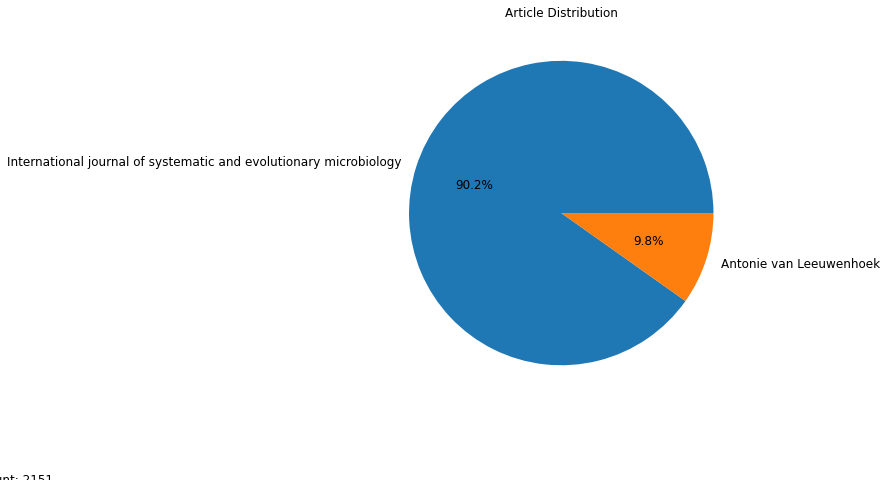

In [34]:
# Create a pie plot
plt.figure(figsize=(7, 7))
plt.pie(df["Journal Name"].value_counts(), labels=df["Journal Name"].unique(), autopct="%1.1f%%", textprops={"fontsize": 12})

# Add annotations
total_count = df["Journal Name"].value_counts().sum()
annotation = f"Total Count: {total_count}"
plt.annotate(annotation, xy=(.5, .5), xytext=(0, 0), textcoords="figure fraction",
             fontsize=12, ha="center", va="center")

plt.title("Article Distribution")
plt.show();


In [1]:
# determine the frequency of occurrence of each type of quinone in the data set.

quinone_counts = df["Tail"].unique().value_counts()
quinone_types = quinone_counts.index

plt.figure(figsize=(100, 10))
plt.bar(quinone_types, quinone_counts)
plt.xlabel("Quinone Types")
plt.ylabel("Frequency")
plt.title("Frequency of Quinone Types")
plt.xticks(rotation=45)
plt.show();


# look for patterns or trends in the data that might indicate a relationship between the length of the quinone tail and the species or genus of the organism.
# create visualizations to better understand and communicate these patterns or relationships.
# based on these patterns or relationships, make predictions about the types of quinones that might be found in other species or genus.
# use these predictions to guide further research or data collection.

NameError: name 'df' is not defined

In [ ]:
#plot the taxonomy - # classify the taxonomy of the organisms based on the species and genus names extracted.
# in order to plot taxonomy:
    # get the whole taxonomy from the NCBI database - ETE3
        # clean the species and genus matching in the Titles of the articles
    # compare the species and genus found and match with the NCBI Bacteria database
    # create a new dataframe with the information taxonmy information from NCBI database and concat it with the df we have
# identify and analyze the type and characteristics of quinones found in each species or genus.
# identify the relationships between the types of quinones found and the species or genus of the organisms.